<a href="https://colab.research.google.com/github/gibiee/study_AI/blob/master/%5BKeras%5DFashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape  # 28 x 28 크기의 이미지 60000개

(60000, 28, 28)

In [0]:
train_labels    # 0 ~ 9 의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

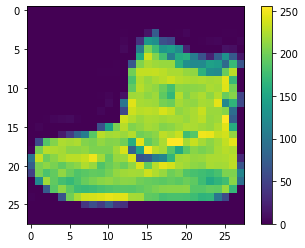

In [0]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

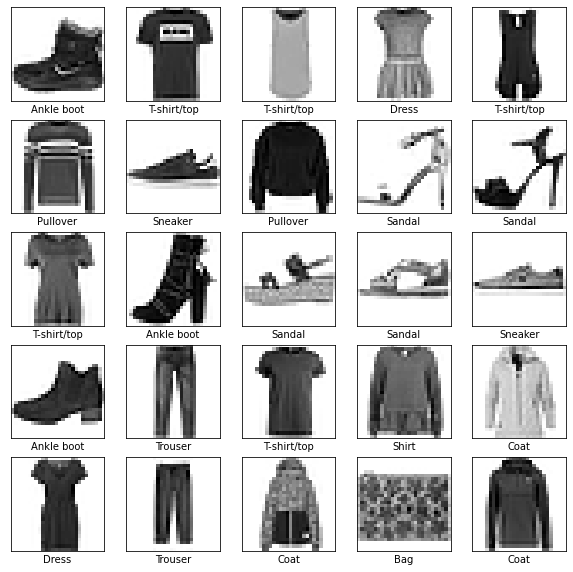

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4969 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3774 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3362 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8921


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도 :', test_acc)

313/313 - 0s - loss: 0.3460 - accuracy: 0.8727
테스트 정확도 : 0.8726999759674072


In [0]:
predictions = model.predict(test_images)
predictions[0]

array([6.9189889e-05, 1.5656051e-09, 5.9469227e-07, 2.8628855e-07,
       1.7860958e-07, 1.6111737e-02, 8.5458441e-06, 5.9309471e-02,
       7.0240244e-06, 9.2449296e-01], dtype=float32)

In [0]:
print("예측 :", np.argmax(predictions[0]))
print("정답 :", test_labels[0])

예측 : 9
정답 : 9


In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label : color = 'blue'
    else : color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

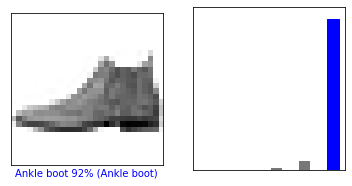

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

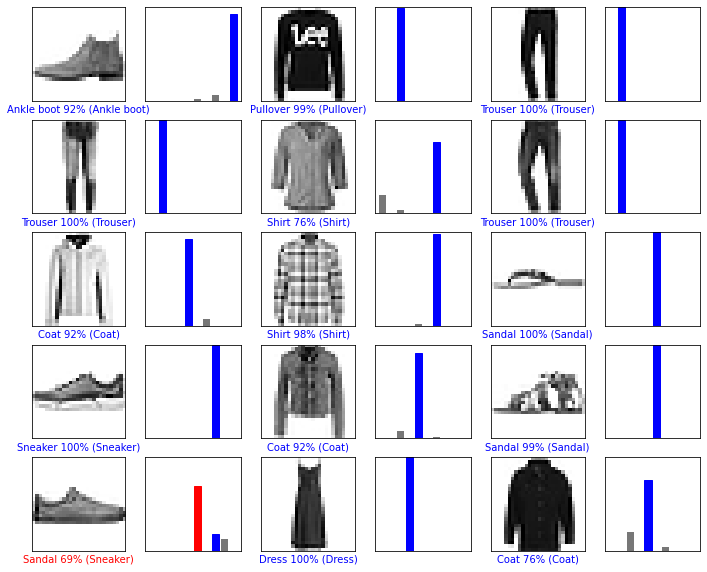

In [0]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)


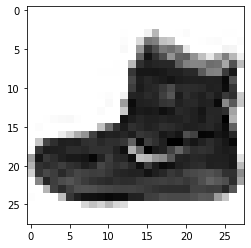

In [0]:
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img,0))   # batch에 이미지를 추가
print(img.shape)

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

[[6.9189955e-05 1.5656141e-09 5.9469335e-07 2.8628855e-07 1.7860974e-07
  1.6111745e-02 8.5458523e-06 5.9309509e-02 7.0240239e-06 9.2449290e-01]]


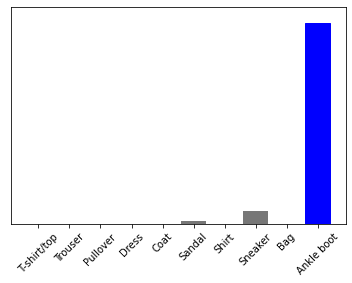

In [0]:
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)